Problema de Poisson:
\begin{align*}
    \begin{cases}
        \nabla^{2}\,u(x, y) = \cos(2\,\pi\,x), \text{ para } (x, y) \in \Omega \\
        u(x, y) = 0, \text{ para } (x, y) \in \partial\,\Omega_{D} \\
        \nabla\,u(x, y)\cdot\,\vec{n} = 0, \text{ para } (x, u) \in \partial\,\Omega_{A, B, C}.
    \end{cases}
\end{align*}

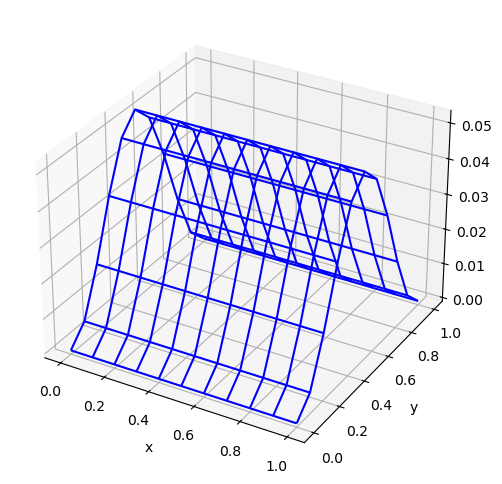

In [2]:
import numpy as np
import matplotlib.pyplot as plt


h = 0.1
x = np.arange(0, 1+h, h)
y = np.arange(0, 1+h, h)

tam = len(x)

# Montar a matriz T para cada coluna do domínio
T = np.zeros((tam, tam))
T[0, 0] = -4
T[0, 1] = 2

for i in range(1, tam-1):
    T[i, i-1], T[i, i], T[i, i+1] = 1, -4, 1

T[tam-1, tam-1] = -4
T[tam-1, tam-2] = 2

# print(T)

I = np.identity(tam)
A1 = np.kron(I, T)

# print(A1)

e2 = np.diag(np.ones(tam-1), -1) + np.diag(np.ones(tam-1), 1)
e2[0, 1] = 0
e2[-1, -2] = 0

# print(e2)

A2 = np.kron(e2, I)

# print(A2)

e3 = np.zeros((tam, tam))
e3[0, 1] = 1
e3[-1, -2] = 1

# print(e3)

A3 = np.kron(e3, 2*I)

A = A1 + A2 + A3

# Condição de Dirichlet
for i in range(tam):
    A[i, :] = 0
    A[i, i] = 1

f = np.zeros(tam*tam)

for i in range(tam):
    for j in range(tam):
        f[i*tam + j] = np.cos(2*np.pi*x[i])

f *= h**2

# Dirichlet
f[0:tam] = 0

solution = np.linalg.solve(A, f)

u = np.zeros((tam, tam))

for i in range(tam):
    for j in range(tam):
        u[i, j] = solution[i*tam + j]

x, y = np.meshgrid(x, y)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(x, y, u, color='blue')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()